# Taxi Demand Surge Pattern Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('taxi_data.csv')
data['ID'] = data.index.values

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Understanding

Data Dictionary – Yellow Taxi Trip Records
<p> <h5>1. VendorID:</h5> A code indicating the TPEP provider that provided the record.1= Creative Mobile Technologies, LLC; 2= VeriFone Inc </p>

<p> <h5>2. tpep_pickup_datetime:</h5> The date and time when the meter was engaged.</p>

<p> <h5>3. tpep_dropoff_datetime:</h5> The date and time when the meter was disengaged.</p>

<p> <h5>4. passenger_count:</h5> The number of passengers in the vehicle. This is a driver-entered value.</p>

<p> <h5>5. trip_distance:</h5> The elapsed trip distance in miles reported by the taximeter.</p>

<p> <h5>6. RatecodeID:</h5>The final rate code in effect at the end of the trip. <br>
1= Standard rate <br>
2=JFK <br>
3=Newark <br>
4=Nassau or Westchester <br>
5=Negotiated fare <br>
6=Group ride </p>

<p> <h5>7. store_and_fwd_flag:</h5> This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. <br>
Y= store and forward trip <br>
N= not a store and forward trip</p>

<p> <h5>8. PULocationID:</h5> TLC Taxi Zone in which the taximeter was engaged</p>

<p> <h5>9. DOLocationID:</h5> TLC Taxi Zone in which the taximeter was disengaged</p>

<p> <h5>10. payment_type:</h5> A numeric code signifying how the passenger paid for the trip. <br>
1= Credit card <br>
2= Cash <br>
3= No charge <br>
4= Dispute <br>
5= Unknown <br>
6= Voided trip </p>

<p> <h5>11. fare_amount:</h5> The time-and-distance fare calculated by the meter </p>

<p> <h5>12. extra:</h5> Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges </p>

<p> <h5>13. mta_tax:</h5> $0.50 MTA tax that is automatically triggered based on the metered rate in use. </p>

<p> <h5>14. tip_amount:</h5> Tip amount – This field is automatically populated for credit card
tips. Cash tips are not included. </p>

<p> <h5>15. tolls_amount:</h5> Total amount of all tolls paid in trip. </p>

<p> <h5>16. total_amount:</h5> The total amount charged to passengers. Does not include cash tips. </p>

<p> <h5>17. congestion_surcharge:</h5> A code indicating the TPEP provider that provided the record.1= Creative Mobile Technologies, LLC; 2= VeriFone Inc </p>

<p> <h5>18. improvement_surcharge:</h5> $0.30 improvement surcharge assessed trips at the flag drop. The
improvement surcharge began being levied in 2015. </p>

<p> <h5>19. ID:</h5> Unique ID to identify each record. </p>

In [3]:
#looking through the data
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,ID
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,0
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,1
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,2
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,3
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,4


In [4]:
#describing the statistical information of the data
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,ID
count,1.271413e+06,1.271413e+06,1.369765e+06,1.271413e+06,1.369765e+06,1.369765e+06,1.271413e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06
mean,1.676925e+00,1.411508e+00,4.631982e+00,1.035081e+00,1.652472e+02,1.614956e+02,1.280521e+00,1.209662e+01,9.705085e-01,4.930411e-01,1.918099e+00,2.477432e-01,2.969412e-01,1.747439e+01,2.116098e+00,6.848820e+05
std,4.676513e-01,1.059833e+00,3.939042e+02,5.994840e-01,6.783849e+01,7.210800e+01,4.916921e-01,1.291338e+01,1.231256e+00,7.632070e-02,2.597153e+00,1.672755e+00,4.222174e-02,1.469343e+01,9.287277e-01,3.954172e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.900000e+02,-5.500000e+00,-5.000000e-01,-1.000000e+02,-3.112000e+01,-3.000000e-01,-4.928000e+02,-2.500000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.240000e+02,1.070000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.080000e+01,2.500000e+00,3.424410e+05
50%,2.000000e+00,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.860000e+00,0.000000e+00,3.000000e-01,1.380000e+01,2.500000e+00,6.848820e+05
75%,2.000000e+00,1.000000e+00,3.020000e+00,1.000000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.750000e+00,0.000000e+00,3.000000e-01,1.912000e+01,2.500000e+00,1.027323e+06
max,2.000000e+00,8.000000e+00,2.631633e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.960500e+03,8.250000e+00,5.000000e-01,1.140440e+03,8.117500e+02,3.000000e-01,7.661280e+03,3.000000e+00,1.369764e+06


In [5]:
#getting info of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369765 entries, 0 to 1369764
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1271413 non-null  float64
 1   tpep_pickup_datetime   1369765 non-null  object 
 2   tpep_dropoff_datetime  1369765 non-null  object 
 3   passenger_count        1271413 non-null  float64
 4   trip_distance          1369765 non-null  float64
 5   RatecodeID             1271413 non-null  float64
 6   store_and_fwd_flag     1271413 non-null  object 
 7   PULocationID           1369765 non-null  int64  
 8   DOLocationID           1369765 non-null  int64  
 9   payment_type           1271413 non-null  float64
 10  fare_amount            1369765 non-null  float64
 11  extra                  1369765 non-null  float64
 12  mta_tax                1369765 non-null  float64
 13  tip_amount             1369765 non-null  float64
 14  tolls_amount      

In [6]:
#checking number of rows and columns
data.shape

(1369765, 19)

# Data Cleaning and Preparation

### Checking how many rows with atleast one column having Null value

In [7]:
data.isnull().sum() * 100 / len(data)

VendorID                 7.18021
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          7.18021
trip_distance            0.00000
RatecodeID               7.18021
store_and_fwd_flag       7.18021
PULocationID             0.00000
DOLocationID             0.00000
payment_type             7.18021
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     0.00000
ID                       0.00000
dtype: float64

Our data has around 7.1% rows with null values in columns 'VendorID', 'RatecodeID', 'store_and_fwd_flag', 'passenger_count', 'payment_type'. These feature are currently irrelevant in our data analysis. Except passenger count, all are categorical variables so we will simply do imputation with mode.

### Imputation of the rows containing null value

In [8]:
# Performing imputation with mode
data['VendorID'] = data['VendorID'].fillna(data['VendorID'].mode()[0])
data['payment_type'] = data['payment_type'].fillna(data['payment_type'].mode()[0])
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].fillna(data['store_and_fwd_flag'].mode()[0])
data['passenger_count'] = data['passenger_count'].fillna(data['passenger_count'].mode()[0])
data['RatecodeID'] = data['RatecodeID'].fillna(data['RatecodeID'].mode()[0])

data.isnull().sum() * 100 / len(data)

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
ID                       0.0
dtype: float64

### Correcting datatype of tpep_pickup_datetime and tpep_dropoff_datetime column

tpep_pickup_datetime and tpep_dropoff_datetime columns have incorrect datatype. So, we need to convert it into datatime format.

In [9]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369765 entries, 0 to 1369764
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1369765 non-null  float64       
 1   tpep_pickup_datetime   1369765 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1369765 non-null  datetime64[ns]
 3   passenger_count        1369765 non-null  float64       
 4   trip_distance          1369765 non-null  float64       
 5   RatecodeID             1369765 non-null  float64       
 6   store_and_fwd_flag     1369765 non-null  object        
 7   PULocationID           1369765 non-null  int64         
 8   DOLocationID           1369765 non-null  int64         
 9   payment_type           1369765 non-null  float64       
 10  fare_amount            1369765 non-null  float64       
 11  extra                  1369765 non-null  float64       
 12  mta_tax                13697

### Checking anomalies with Pickup time and drop time

Pickup time will be always before drop-off time. We need to find rows with anomalies with trip duration.

In [10]:
pd_time_anomaly = len(data[data['tpep_pickup_datetime'] >= data['tpep_dropoff_datetime']])
print(f"Total rows with anomalies with trip duration: {pd_time_anomaly}")

Total rows with anomalies with trip duration: 6557


In [11]:
# Removing all rows anomalies with trip duration
data = data[data['tpep_pickup_datetime'] < data['tpep_dropoff_datetime']]
pd_time_anomaly = len(data[data['tpep_pickup_datetime'] > data['tpep_dropoff_datetime'] ])
print(f"Now, total rows with anomalies with trip duration: {pd_time_anomaly}")

Now, total rows with anomalies with trip duration: 0


In [12]:
# Adding new calculated column to store trip duration time
data['duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data['duration'] = data['duration'] / np.timedelta64(1, 'm')
data[data['duration'] > 180].sort_values('duration', ascending=False).head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,ID,duration
302612,1.0,2021-01-09 00:46:44,2021-01-29 01:04:26,1.0,4.10,1.0,N,238,168,2.0,14.50,0.5,0.5,0.0,0.0,0.3,15.80,0.0,302612,28817.700000
344032,2.0,2021-01-10 10:56:18,2021-01-13 12:35:25,1.0,0.00,1.0,N,264,264,2.0,2.50,0.0,0.5,0.0,0.0,0.3,3.30,0.0,344032,4419.116667
591780,2.0,2021-01-15 18:35:33,2021-01-17 06:29:09,1.0,0.02,1.0,N,168,20,2.0,3.00,0.0,0.5,0.0,0.0,0.3,3.80,0.0,591780,2153.600000
750652,2.0,2021-01-20 00:18:37,2021-01-21 08:38:04,1.0,4.24,1.0,N,263,24,2.0,15.00,1.3,0.5,0.0,0.0,0.0,19.30,2.5,750652,1939.450000
1310228,2.0,2021-01-13 23:01:03,2021-01-15 03:01:12,1.0,7.52,1.0,N,265,194,1.0,32.42,0.0,0.5,0.0,0.0,0.3,33.22,0.0,1310228,1680.150000


We can see the longest trip duration is 28817.70. There seems to be some anomaly. Lets keep 180 mins as a threshold and remove the rows with trip duration more than 180 mins

In [13]:
long_trip_anomaly = len(data[data['duration'] > 180])
print(f"Total rows with anomalies with trip duration: {long_trip_anomaly}")

Total rows with anomalies with trip duration: 2506


In [14]:
# Removing all rows anomalies with trip duration
data = data[data['duration'] <= 180]
long_trip_anomaly = len(data[data['duration'] > 180])
print(f"Now, total rows with anomalies with trip duration: {long_trip_anomaly}")

Now, total rows with anomalies with trip duration: 0


### Checking total count of rows where trip distance is 0.00

We will check whether there are any outliers in trip distance records

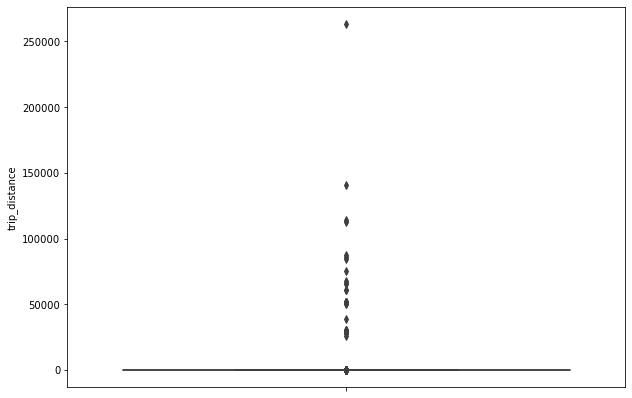

In [15]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
sns.boxplot(y=data["trip_distance"] );
plt.show()

Here, we can there are some records with trip distance 0 and also few outliers with trip distance more than 100k mile. These records must be elimated from our analysis.

In [16]:
# Checking total count of rows where trip distance is 0.00
zero_trip_dist_count = len(data[data['trip_distance'] == 0.00])
print(f"Total {zero_trip_dist_count} rows have trip distance as 0.00. So, we will drop those rows from the dataset")

Total 19221 rows have trip distance as 0.00. So, we will drop those rows from the dataset


In [17]:
# Removing all rows where trip distance is 0.00
data = data[data['trip_distance'] != 0.00]
zero_trip_dist_count = len(data[data['trip_distance'] == 0.00])
print(f"Now, number of rows with 0.00 trip distance are {zero_trip_dist_count}")

Now, number of rows with 0.00 trip distance are 0


In [18]:
# Checking total count of rows where trip distance is greater than 100 miles
long_trip_dist_count = len(data[data['trip_distance'] > 100])
print(f"Total {long_trip_dist_count} rows have trip distance greater than 100. So, we will drop those rows from the dataset considering those as outliers.")

Total 46 rows have trip distance greater than 100. So, we will drop those rows from the dataset considering those as outliers.


In [19]:
# Removing all rows where trip distance is 0.00
data = data[data['trip_distance'] <= 100]
long_trip_dist_count = len(data[data['trip_distance'] > 100])
print(f"Now, number of rows with trip distance greater than 100 are {long_trip_dist_count}")

Now, number of rows with trip distance greater than 100 are 0


### Checking total count of rows where passenger count is 0

In [20]:
# Checking total count of rows where passenger count is 0
zero_passengers = len(data[data['passenger_count'] == 0.00])
print(f"Total {zero_passengers} rows have passenger count 0.")

Total 26253 rows have passenger count 0.


Valid taxi data should have atleast 1 passenger. So, we need to remove the data records which have passenger value as 0.

In [21]:
# Removing all rows where passenger count is 0
data = data[data['passenger_count'] != 0.0]
zero_passengers = len(data[data['passenger_count'] == 0.0])
print(f"Now, number of rows with 0 passenger count are {zero_passengers}")

Now, number of rows with 0 passenger count are 0


### Checking anomalies fare amount

In [22]:
# Checking total count of rows where fare amount is less than or equal to 0
zero_fare = len(data[data['fare_amount'] <= 0.00])
print(f"Total {zero_fare} rows have fare_amount 0.")

Total 6388 rows have fare_amount 0.


As we can see there are few records with fare amount less than or equal to 0. These are not valid records for our analysis.
So, we will remove all these records.

In [23]:
# Removing all rows where fare amount is 0
data = data[data['fare_amount'] > 0.0]
zero_fare = len(data[data['fare_amount'] <= 0.0])
print(f"Now, number of rows with 0 or less fare amount are {zero_fare}")

Now, number of rows with 0 or less fare amount are 0


### Changing categorical variable into numeric/boolean

All input and output variables in machine learning models must be numeric.
This means that if our data contains categorical data, we must convert it to numbers before fitting and evaluating a model.
Here, 'store_and_fwd_flag' is Y/N. So, we will convert it to boolean values 0 or 1.   

In [24]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].replace({'N': 0, 'Y': 1})
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,ID,duration
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,0,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,0,6.033333
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,0,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,1,0.983333
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,0,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,2,27.600000
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,0,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,4,16.533333
5,1.0,2021-01-01 00:16:29,2021-01-01 00:24:30,1.0,1.60,1.0,0,224,68,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5,5,8.016667


# Exploratory Data Analysis

### 1. Heat map of the correlation matrix

<AxesSubplot:>

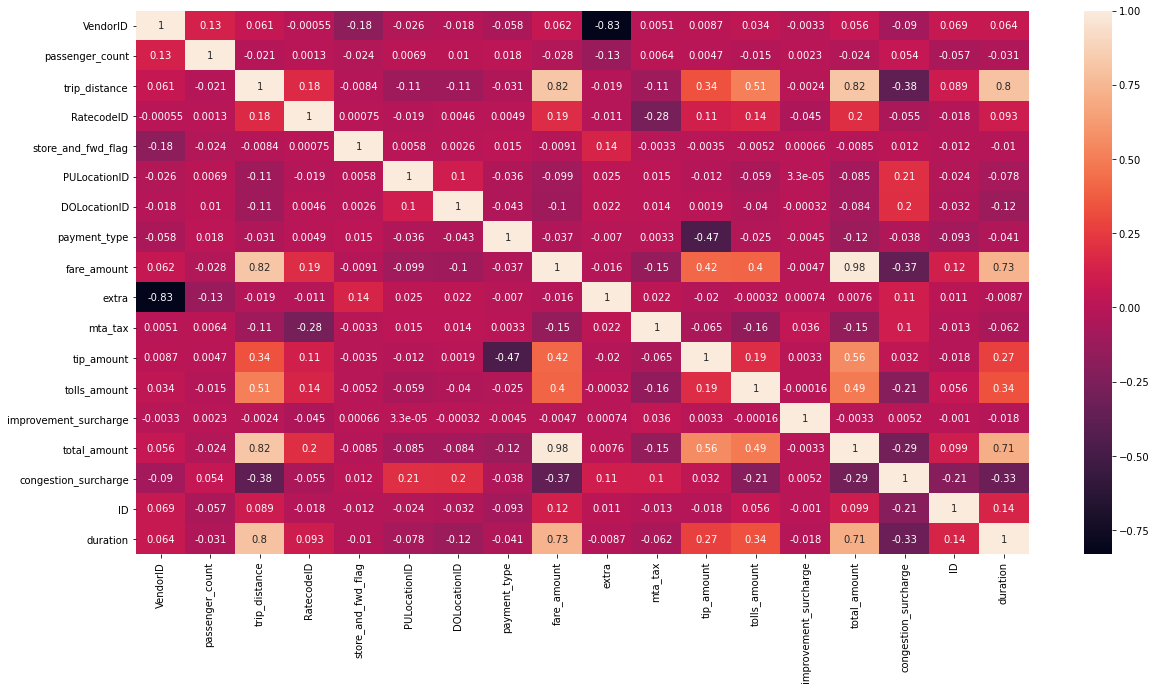

In [25]:
#getting correlation matrix
corr = data.corr()
#plotting heat map
ax, fig = plt.subplots(figsize=[20,10])
sns.heatmap(corr, annot=True)

We can deduce few finding from the correlation matrix heatmap:
1. Fare amout is correlated with trip duration and distance.
2. Tip amount is also correlated with fare amount. It can be obvious

### 2. Heat map of hourly taxi ride count of each day in month

In [26]:
data['date'] = data['tpep_pickup_datetime'].dt.date
data['hr'] = data['tpep_pickup_datetime'].dt.hour
hours = data.pivot_table(
    index='date',
    columns='hr',
    values='VendorID',
    aggfunc='count'
)

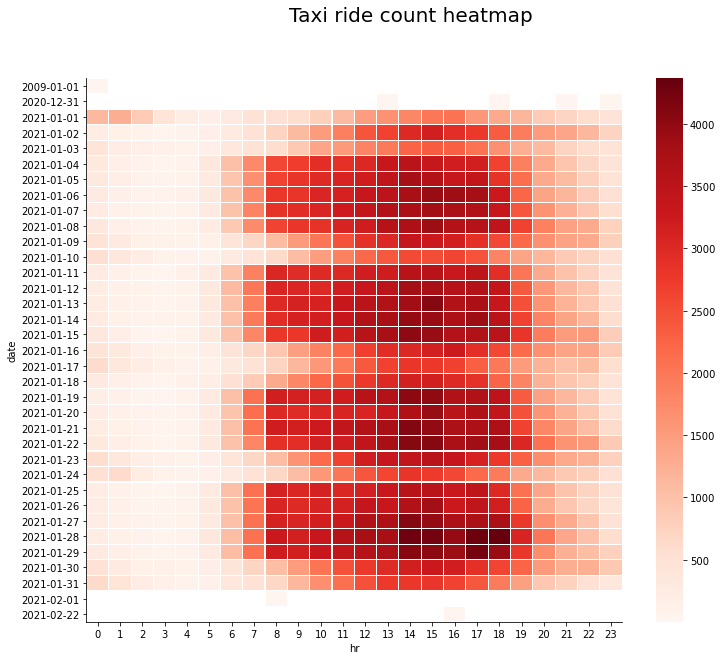

In [27]:
fig = plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    data=hours,
    fmt='.1%',
    linewidths=0.1,
    cmap="Reds"
)
fig.suptitle('Taxi ride count heatmap', fontsize=20)
sns.despine()
plt.show()

Taxi ride count heatmap shows some interesting obervations.
By observing heatmap, we can see Taxi demard surge generally start increasing at 6 AM in the morning. Demand is at peak between 1 P.M. to 6 P.M. This pattern is followed on weekdays.
On weekends, taxi demand seems to be less as compared to weekdays. Also, taxi demand can be seen more on Saturdays than Sundays.
We can see on interesting observation from the ride count heatmap. Taxi demand surge can be seen from 12 A.M. to 3 A.M. on 1 Jan 2021. It must be becuase people are returning home after new year celebration/ party.

### 3. Pick-ups hourly distribution

In [28]:
data['hh_pickup'] = data.tpep_pickup_datetime.dt.hour.astype(np.uint8)
data['hh_dropoff'] = data.tpep_dropoff_datetime.dt.hour.astype(np.uint8)

Text(0, 0.5, 'No of Trips made')

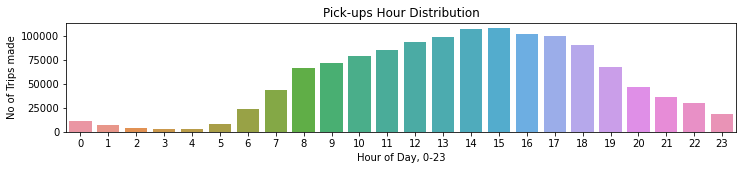

In [29]:
# pickup time distribution, hour-of-day
plt.figure(figsize=(12,2))

graph_data = data.groupby('hh_pickup').aggregate({'ID':'count'}).reset_index()
sns.barplot(x='hh_pickup', y='ID', data=graph_data)

plt.title('Pick-ups Hour Distribution')
plt.xlabel('Hour of Day, 0-23')
plt.ylabel('No of Trips made')

Pick-ups hourly distribution chart shows that taxi demand is less in the early morning. Demand start surging as the day passes. Demand is at peak in the afternoon. Then, it gradually slows down till the end of the day.

### 4. Pick-ups weekly distribution

In [30]:
# dow names for plot mapping
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# day of week
data['dow_pickup'] = data.tpep_pickup_datetime.dt.weekday.astype(np.uint8)
data['dow_dropoff'] = data.tpep_dropoff_datetime.dt.weekday.astype(np.uint8)

Text(0, 0.5, 'No of Trips made')

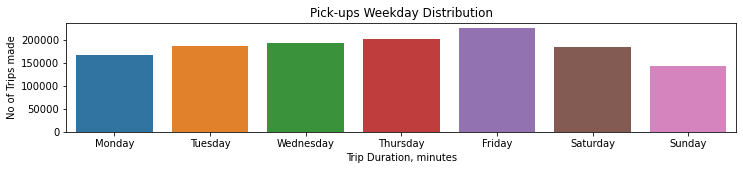

In [31]:
# pickup distribution, by weekday
plt.figure(figsize=(12,2))

graph_data = data.groupby('dow_pickup').aggregate({'ID':'count'}).reset_index()
sns.barplot(x='dow_pickup', y='ID', data=graph_data)

plt.title('Pick-ups Weekday Distribution')
plt.xlabel('Trip Duration, minutes')
plt.xticks(range(0,7), dow_names, rotation='horizontal')
plt.ylabel('No of Trips made')

Pick-ups weekly distribution chart shows that taxi demand is the highest on Fridays. We can see the gradual increase in taxi demand from Monday to Friday. Tax demand is the lowest on Sundays.

# Research Objectives 

### 1. Finding hourly pattern in the surge in demand during a day

In [32]:
pu_counts = data.groupby(['hh_pickup'])['hh_pickup'].count()

In [33]:
do_counts = data.groupby(['hh_dropoff'])['hh_dropoff'].count()

In [34]:
df_pu = pd.DataFrame({'time':pu_counts.index, 'pu_counts':pu_counts.values})
df_do = pd.DataFrame({'time':do_counts.index, 'do_counts':do_counts.values})

In [35]:
df_pu['time'] = df_pu['time'].astype(int)
df_pu['pu_counts'] = df_pu['pu_counts'].astype(int)
df_do['time'] = df_do['time'].astype(int)
df_do['do_counts'] = df_do['do_counts'].astype(int)
df_pdcounts = df_pu.merge(df_do, on="time")
df_pdcounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   time       24 non-null     int64
 1   pu_counts  24 non-null     int64
 2   do_counts  24 non-null     int64
dtypes: int64(3)
memory usage: 768.0 bytes


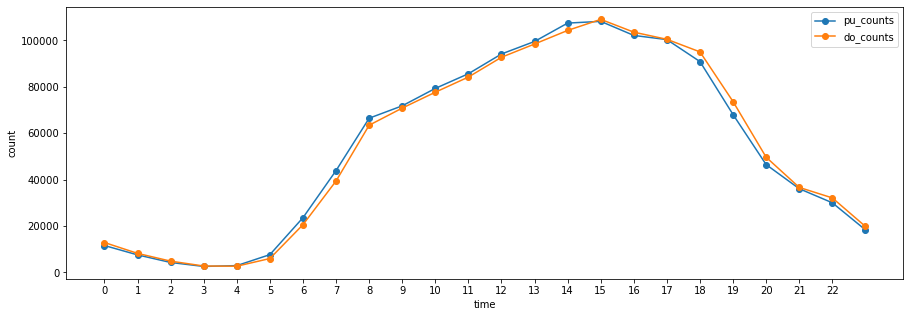

In [36]:
ax = df_pdcounts.plot(x='time', y=['pu_counts', 'do_counts'], kind='line', style="-o", figsize=(15,5))
ax.set_ylabel("count")
plt.xticks(np.arange(0, 23, step=1.0))
plt.show()

- Taxi demand surge can be seen in the afternoon and is highest between 2 P.M. to 3 P.M.
- Taxi demand is lowest in the early morning between 3 A.M. to 4 A.M.

### 2. Hourly pattern in the surge in demand for whole week

([<matplotlib.axis.XTick at 0x7faa0e25c7f0>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

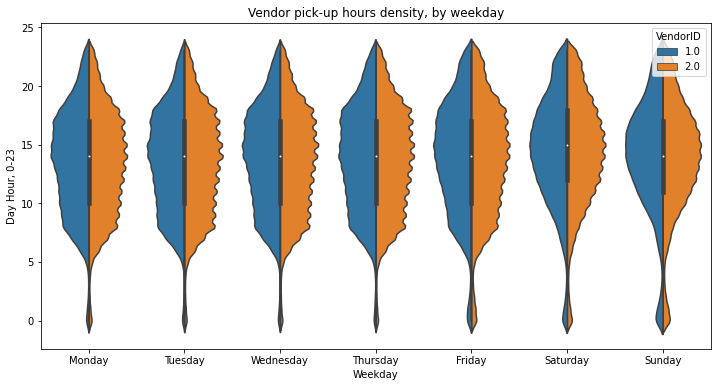

In [37]:
# vendor pick-up hours density by weekdays
plt.figure(figsize=(12,6))
sns.violinplot(x=data.dow_pickup, 
               y=data.hh_pickup, 
               hue=data.VendorID, 
               split=True)

plt.title('Vendor pick-up hours density, by weekday')
plt.xlabel('Weekday')
plt.ylabel('Day Hour, 0-23')
plt.xticks(range(0,7), dow_names, rotation='horizontal')

- As like our previous obervations, Violin plot also show that taxi demand surge is less in the early morning. Demand start surging as the day passes. Demand is at peak in the afternoon. Then, it gradually slows down till the end of the day.
- One interesting observation is that we can see surge in taxi demand in the midnight during the weekends. It could be possible because people go out on weekend for movies/ dinner.